In [32]:
import sys
sys.path.insert(0, '/mnt/deliang-data/projects/CovidDepressionAnalysis/scripts/data_processing')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

import pickle as pkl

from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
from constants import *


from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imputation_data_structure import *


import shap
import xgboost
from xgboost import cv

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
df = pd.read_csv('../output/v3_python/ucl_big_five_summary.csv', index_col=0)

df_target = df.drop('record_id', axis=1).melt(id_vars=['type'], var_name="personality", value_name="Value")


In [34]:
df_target

,type,personality,Value
0,negative,n,0.333333
1,negative,n,0.444444
2,negative,n,0.222222
3,negative,n,0.055556
4,negative,n,0.166667
...,...,...,...
203330,neutral,c,0.833333
203331,neutral,c,0.555556
203332,neutral,c,0.777778
203333,neutral,c,1.000000


Text(0.5, 1.0, 'n_positive=4509(0.11) n_negative=2553(0.06)')

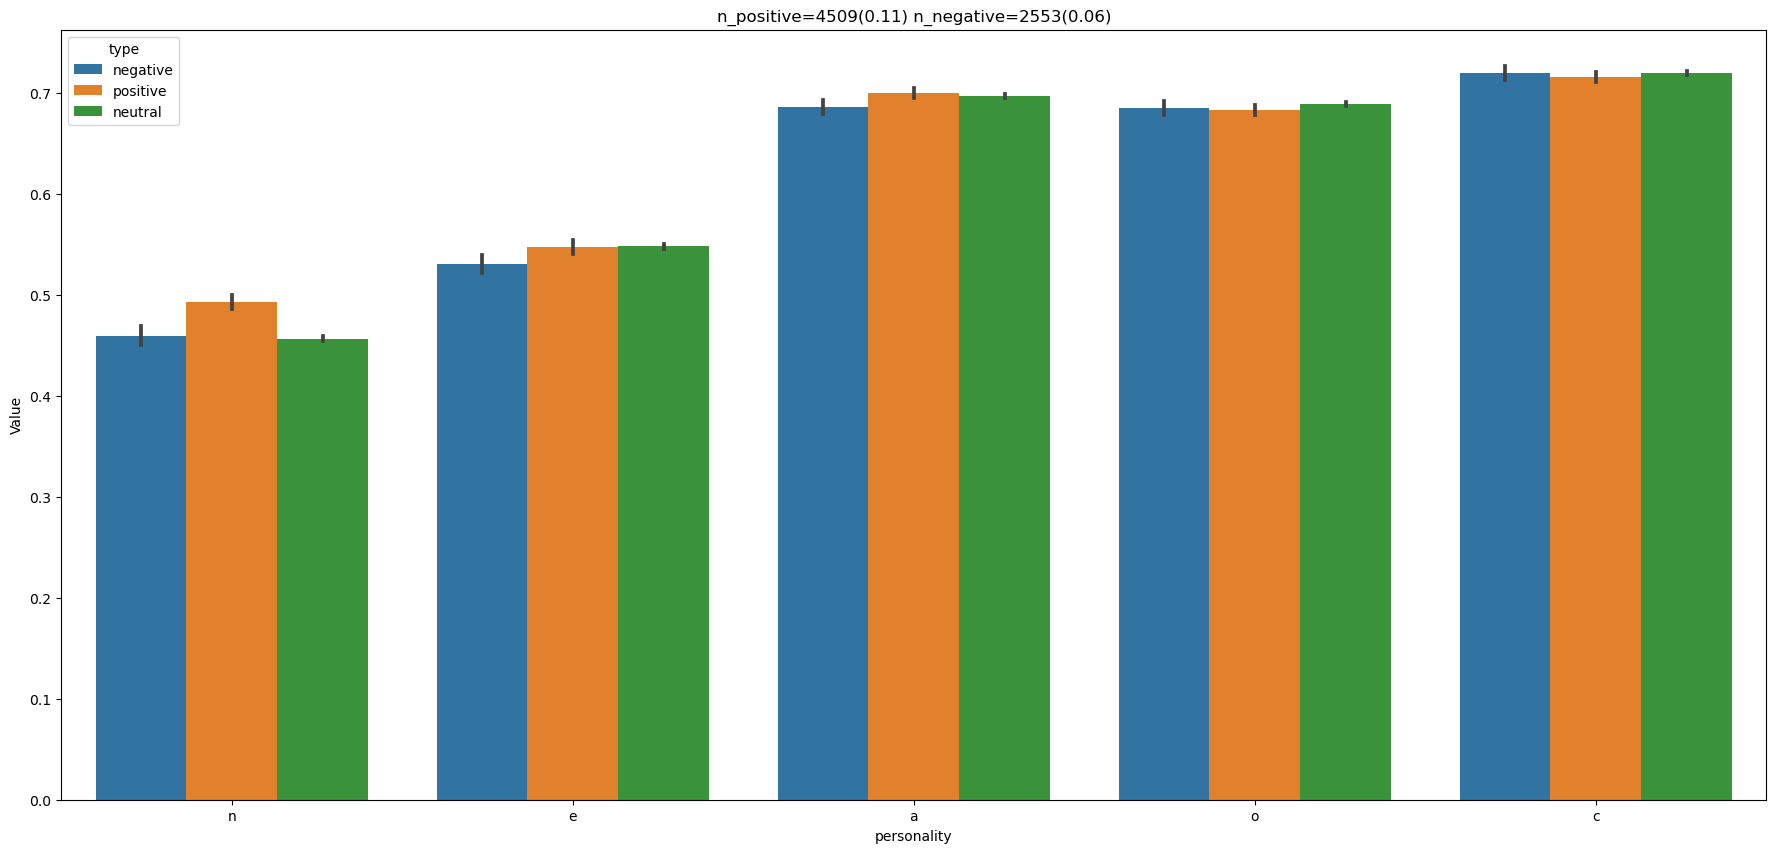

In [35]:
fig = plt.figure(figsize = (22, 10))
sns.barplot(df_target, x='personality', y='Value', hue='type')

n_positive = len(df.loc[df['type']=='positive'])
n_negative = len(df.loc[df['type']=='negative'])
n_neutral = len(df.loc[df['type']=='neutral'])
n = len(df)
positive_percentage = np.round(n_positive/n, 2)
negative_percentage = np.round(n_negative/n, 2)

plt.title('n_positive='+str(n_positive) + '({})'.format(str(positive_percentage)) + ' n_negative='+str(n_negative) + '({})'.format(str(negative_percentage)))